# Lab 3 - RECINFO

## Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas) (5 pts).

NOvas 

- Se não for stopwords em pt-br
- Se conter mais de 3 caracteres
- Palavras com hifem é tratada como uma concatenada

## Refaça a questão 2 do Laboratório anterior usando os tokens produzidos (5 pts).

In [16]:
import re

import pandas
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import RSLPStemmer
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('punkt')
nltk.download('rslp')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
url = "https://raw.githubusercontent.com/gabrielsvinha/text_processing/master/input.csv"
news_list = pandas.read_csv(url).replace(np.nan, '', regex=True)
documents_cc = news_list.text.count()

tokenizer = RegexpTokenizer('''\w+[-']*\w*''')
sw = stopwords.words("portuguese")
words = []

for entry in news_list.text:
    tokens = []
    for token in tokenizer.tokenize(entry):
        if token not in sw and len(token) > 3:
             tokens.append(token)
    words.extend(tokens)

total_occurencies = len(words)
voc = len(set(words))

df = pandas.DataFrame(words, columns=['w'])
word_cc = df.w.value_counts().reset_index()
word_cc.columns = ["w", "frequency"]
word_cc['r'] = word_cc.frequency.rank(ascending=False, method='first')

word_cc["PR"] = round((word_cc.frequency / total_occurencies) * 100, 2)
word_cc["r.PR"] = round(word_cc.r * word_cc["PR"]  / 100, 3)
word_cc[:50]    

[nltk_data] Downloading package punkt to /home/vinha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to /home/vinha/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vinha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/vinha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,w,frequency,r,PR,r.PR
0,anos,582,1.0,0.51,0.005
1,sobre,416,2.0,0.37,0.007
2,Bolsonaro,375,3.0,0.33,0.010
3,presidente,366,4.0,0.32,0.013
4,Brasil,332,5.0,0.29,0.014
5,ainda,289,6.0,0.26,0.016
6,país,289,7.0,0.26,0.018
7,Governo,280,8.0,0.25,0.020
8,pessoas,235,9.0,0.21,0.019
9,contra,231,10.0,0.20,0.020


## Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos. (5 pts).

### Falsos Negativos

- 'fed', ['feder', 'fede', 'fed']
- 'bolson', ['bolsonar'] | 'bolsonar', ['bolsonaro']
- 'sexta-f', ['sexta-f'] | 'sexta', ['sexta']
- 'dev', ['dev', 'devor'] | 'devor', ['devorou']
- 'brasil', ['brasil', 'brasile'] | 'brasile', ['brasileiro']
- 'advocac', ['Advocacia'] | advocacia-ger, ['Advocacia-Geral']
- 'aul' - ['aula', 'aulas'] | aula-debat, ['aula-debate']

### Falsos Negativos

- 'ele', ['Eles', 'Ele', 'eleição', 'Eleições']
- 'alm', ['alm', 'almir', 'alme']
- 'arr', ['arras', 'arrei', 'arr']
- 'mor', ['mor', 'moros', 'mora']
- 'sem', ['sens', 'sem', 'seme']
- 'pi', ['pi', 'pior', 'pis']
- 'insensivel', ['insensibil']
- 'sent', ['sentidos', 'sentir', 'sentavam', 'sentindo']
- 'comp', ['compos', 'compar', 'comp', 'compens', 'compars']
- 'cas', ['caso', 'casos', 'casa']

In [22]:
stem = nltk.stem.RSLPStemmer()

stemmed = []

for token in words:
#     print("token: %s | stem: %s" % (token, stem.stem(token)))
    stemmed.append(stem.stem(token))

## Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais? (10 pts.)

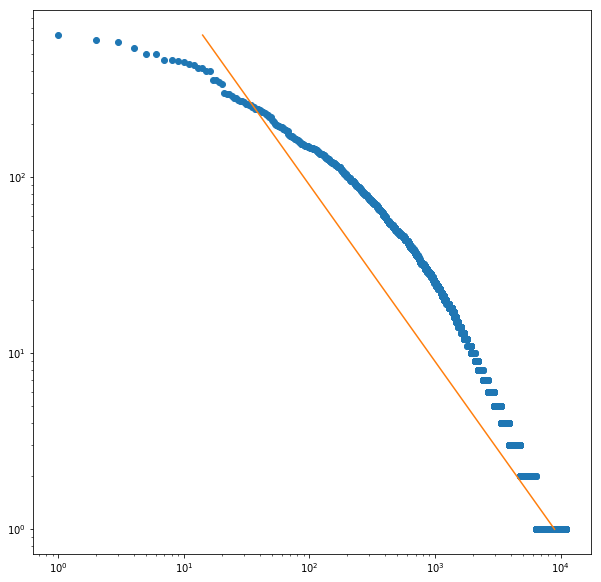

In [14]:
total_stemmed_tokens_ocurrences = len(stemmed)

words = pandas.DataFrame(stemmed, columns=['word'])
table_stemming = words.word.value_counts().reset_index()
table_stemming.columns = ['word', 'freq']
table_stemming['r'] = table_stemming.freq.rank(ascending=False, method='first')

pr_stemming = table_stemming.freq / total_stemmed_tokens_ocurrences * 100
rpr_stemming = table_stemming.r * word_cc["PR"] / 100


table_stemming['pred'] = np.mean(rpr_stemming) / pr_stemming * 100 

f, ax = plt.subplots(figsize=(10, 10))
ax.set(xscale="log", yscale="log")

plt.plot(table_stemming['r'], table_stemming['freq'], linestyle="", marker='o')
plt.plot(table_stemming['pred'], table_stemming['freq'], linestyle="-", marker='')
plt.show()